<a href="https://colab.research.google.com/github/wanderwilson/Estrutura_Dados/blob/main/Exercicio_Pratico_4_Arvores_WanderWilson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

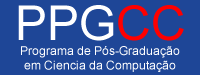

# **Exercício Prático 4**

Discente: **Wander Wilson**

Obs.: As execuções devem ser realizadas em ordem sequencial, de cima para baixo.


Para facilitar a geração de gráficos, foram definidos arrays específicos para cada algoritmo.

# **Árvore Rubro Negra**

In [ ]:
# Red-black Tree implemented in Python 3.x
# Adaptado de: https://github.com/MarcoNasc/red-black-tree/blob/master/tree.py
import random, math, timeit, altair as alt, pandas as pd
from queue import Queue

TempoLocal = TempoLocalBusca = 0
TempoInsereRBN = []
TempoInsereAVL = []
TempoBuscaRBN = []
TempoBuscaAVL = []
TempoTotalRBN = []
EntradasAVL = []
EntradasRBN = []
AlgoritmosAVL = []
AlgoritmosRBN = []


# The possible Node colors
BLACK = 'BLACK'
RED = 'RED'
colors = [BLACK, RED]


class Node:
    """
    Node of the red-black tree.
	Contains references to the sons (if any), the father and the color.
	"""
    def __init__(self, value, color, parent, left=None, right=None):
        """
        Class builder.
		Parameters
		----------
		self : Node
			A Node object.
		value : int
			The value assigned to the Node object. If not an integer, it will raise an AssertionError and give a message explaining the problem.
		color : str
			The Node color. The Node will be always be initialized as having the color RED in the insert() function. AssertionError wil be raised if given
        a color different from the two possible ones.
		parent : Node
			The parent Node. An AssertionError will be raised if an object of another type is provided.
        left: Node (default = None)
            The left child of the Node, also a Node object. 
        right: Node (default = None)
            The left child of the Node, also a Node object.
		-------
		Node
			A Node object.
		"""
        assert isinstance(value, int), "Value must be an integer!"    
        assert color in colors, "Sorry, invalid color!"
        self.value  = value
        self.color  = color
        self.parent = parent
        self.left   = left
        self.right  = right

    def __bool__(self):
        """
        Boolean verification.
		Used to verify the boolean value held by the Node object, this special method will be used to assign a False boolean value to the "NIL_LEAF", as it's value wil also be False.
        The goal of this implementation is to facilitate our verifications made in the beggining of every function inside the RedBlackTree().
		Parameters
		----------
		self : Node
			A Node object.
		Returns
		------
		bool
			The boolean value of the Node object, taking into account the aforementioned conditions.
		"""
        if self.value == False:
            return False
        return True

    def __repr__(self):
        """
        Character representation.
		Shows the value held by the Node object, as well as the previous one (the parent) and next ones (left and right children), if existent.
		Parameters
		----------
		self : Node
			A Node object.
		Returns
		-------
		str
			The representation of the Node object, containing the aforementioned characteristics.
		"""
        if not self.left and not self.right:
            return f'Node has value {self.value} and is {self.color}.\nHas no chidren and {self.parent.value} as parent node.'
        elif self.left and not self.right:
            return f'Node has value {self.value} and is {self.color}.\nHas {self.left.value} as left child and {self.parent.value} as parent node.'
        elif not self.left and self.right:
            return f'Node has value {self.value} and is {self.color}.\nHas {self.right.value} as right child and {self.parent.value} as parent node.'
        else:
            return f'Node has value {self.value} and is {self.color}.\nHas two children, {self.left.value} and {self.right.value} as left and right child, respectively, and also {self.parent.value} as parent node.'
       


###########################################################################

#from node import *

# Usual functions are used to check if there is a root in the tree
# and to call their pair "private" _function. Those two parts could be brought together,
# but are divided for organization purposes.


    
class RedBlackTree:
    
    NIL_LEAF = Node(value=False, color=BLACK, parent=None)

    def __init__(self):
        """
        Class builder.
		Parameters
		----------
		self : RedBlackTree
			A RedBlackTree object.
            The tree is initialized empty at first, without a root. The first call to the insert() function will set the root of the tree.
        ------
        root : Node (default = None)
            The tree is initialized empty at first, without a root. The first call to the insert() function will set the root of the tree.
        ------
		RedBlackTree
			A RedBlackTree object.
		"""
        self.root = self.NIL_LEAF

    def __repr__(self):
        if not self.root:
            return ''
        content = '\n'  # to hold final string
        cur_nodes = [self.root]  # all nodes at current level
        cur_height = self.height(self.root)  # height of nodes at current level
        sep = ' ' * (2 ** (cur_height - 1))  # variable sized separator between elements
        while True:
            cur_height += -1  # decrement current height
            if len(cur_nodes) == 0:
                break
            cur_row = ' '
            next_row = ''
            next_nodes = []

            if all(n is None for n in cur_nodes):
                break

            for n in cur_nodes:

                if n == None:
                    cur_row += '   ' + sep
                    next_row += '   ' + sep
                    next_nodes.extend([None, None])
                    continue

                if n.value:
                    buf = ' ' * int((5 - len(str(n.value))) / 2)
                    if n.color == RED:
                        # cur_row += f"{buf}{RED[0], str(n.value)}{buf}" + sep
                        cur_row += '{}{}{}'.format(buf, RED[0]+str(n.value), buf) + sep
                    elif n.color == BLACK:
                        # cur_row += f"{buf}{BLACK[0], str(n.value)}{buf}" + sep
                        cur_row+='{}{}{}'.format(buf, BLACK[0]+str(n.value), buf)+  sep

                else:
                    cur_row += ' ' * 5 + sep

                if n.left:
                    next_nodes.append(n.left)
                    next_row += ' /' + sep
                else:
                    next_row += '  ' + sep
                    next_nodes.append(None)

                if n.right:
                    next_nodes.append(n.right)
                    next_row += '\ ' + sep
                else:
                    next_row += '  ' + sep
                    next_nodes.append(None)

            content += (cur_height * '   ' + cur_row + '\n' + cur_height * '   ' + next_row + '\n')
            cur_nodes = next_nodes
            sep = ' ' * int(len(sep) / 2)  # cut separator size in half
        return content

    def Insert(self, value):
        if not self.root:
            self.root = Node(value, color=BLACK, parent=self.NIL_LEAF, left=self.NIL_LEAF, right=self.NIL_LEAF)
        else:
            self._insert(value, self.root)

    def _insert(self, value, parent_node):
        
        if value < parent_node.value:
            if not parent_node.left:
                parent_node.left = Node(value, color=RED, parent=parent_node, left=self.NIL_LEAF, right=self.NIL_LEAF)
                self._fixup_insertion(parent_node.left)
            else:
                self._insert(value, parent_node.left)

        elif value > parent_node.value:
            if not parent_node.right:
                parent_node.right = Node(value, color=RED, parent=parent_node, left=self.NIL_LEAF, right=self.NIL_LEAF)
                self._fixup_insertion(parent_node.right)
            else:
                self._insert(value, parent_node.right)

        else:
            raise ValueError('Value already in tree, try another one!')        

    def _fixup_insertion(self, node):  
            while node.parent.color == RED:
                if node.parent == node.parent.parent.left:
                    y = node.parent.parent.right
                    if y.color == RED:
                        node.parent.color = BLACK                           
                        y.color = BLACK                                     
                        node.parent.parent.color = RED                      
                        node = node.parent.parent                           
                    else:
                        if node == node.parent.right:
                            node = node.parent                              
                            self._left_rotate(node)                                                                    
                        node.parent.color = BLACK                           
                        node.parent.parent.color = RED                      
                        self._right_rotate(node.parent.parent)              
                else: # same thing but with 'right' and 'left' exchanged
                    y = node.parent.parent.left
                    if y.color == RED:
                        node.parent.color = BLACK                           
                        y.color = BLACK                                     
                        node.parent.parent.color = RED                      
                        node = node.parent.parent                           
                    else:
                        if node == node.parent.left:
                            node = node.parent                              
                            self._right_rotate(node)                        
                        node.parent.color = BLACK                           
                        node.parent.parent.color = RED                      
                        self._left_rotate(node.parent.parent)               
            self.root.color = BLACK
            #print(self)

    def delete(self, value):
        if self.root:
            return self._delete(self.find(value))
        else:
            raise ValueError('The tree is empty! Try again after inserting some values in it.')

    def _delete(self, node):
        other_node = node
        other_node_original_color = other_node.color
        if not node.left:
            third_node = node.right
            self._transplant(node, node.right)
        elif not node.right:
            third_node = node.left
            self._transplant(node, node.left)
        else:
            other_node == self._minimum_node(node.right)
            other_node_original_color = other_node.color
            third_node = other_node.right
            if other_node.parent == node:
                third_node.parent = other_node
            else:
                self._transplant(other_node, other_node.right)
                other_node.right = node.right
                other_node.right.parent = other_node
            self._transplant(node, other_node)
            other_node.left = node.left
            other_node.left.parent = other_node
            other_node.color = node.color
        if other_node_original_color == BLACK:
            self._fixup_deletion(third_node)
        print(self)


    def _fixup_deletion(self, node):
        while node != self.root and node.color == BLACK:
            if node == node.parent.left:
                other_node = node.parent.right
                if other_node.color == RED:
                    other_node.color == BLACK
                    node.parent.color = RED
                    self._left_rotate(node.parent)
                if other_node.left.color == BLACK and other_node.right.color == BLACK:
                    other_node.color = RED
                    node = node.parent
                else:
                    if other_node.right.color == BLACK:
                        other_node.left.color == BLACK
                        other_node.color == RED
                        self._right_rotate(other_node)
                    other_node.color = node.parent.color
                    node.parent.color = BLACK
                    other_node.right.color = BLACK
                    self._left_rotate(node.parent)
                    node = self.root
            else:
                other_node = node.parent.left
                if other_node.color == RED:
                    other_node.color == BLACK
                    node.parent.color = RED
                    self._right_rotate(node.parent)
                if other_node.right.color == BLACK and other_node.left.color == BLACK:
                    other_node.color = RED
                    node = node.parent
                else:
                    if other_node.left.color == BLACK:
                        other_node.right.color == BLACK
                        other_node.color == RED
                        self._left_rotate(other_node)
                    other_node.color = node.parent.color
                    node.parent.color = BLACK
                    other_node.left.color = BLACK
                    self._right_rotate(node.parent)
                    node = self.root
        node.color = BLACK


    def _transplant(self, node, other_node):
        if not node.parent:
            self.root = other_node
        elif node == node.parent.left:
            node.parent.left = other_node
        else:
            node.parent.right = other_node
        other_node.parent = node.parent

    def maximum(self):
        if self.root:
            return self._maximum(self.root)
        else:
            raise ValueError('The tree is empty! Try again after inserting some values in it.')

    def _maximum(self, node):
        while node.right:
            node = node.right
        return node.value

    def minimum(self):
        if self.root:
            return self._minimum(self.root)
        else:
            raise ValueError('The tree is empty! Try again after inserting some values in it.')

    def _minimum(self, node):
        while node.left:
            node = node.left
        return node.value

    def _mininum_node(self, node):
        while node.left:
            node = node.left
        return node

    def _maximum_node(self, node):
        while node.right:
            node = node.right
        return node
        
    def height(self, node):
        if self.root:
            return self._height(self.root, 0)
        else:
            raise ValueError('The tree is empty! Try again after inserting some values in it.')

    def _height(self, cur_node, cur_height):
        if not cur_node:
            return cur_height
        left_height = self._height(cur_node.left, cur_height + 1)
        right_height = self._height(cur_node.right, cur_height + 1)
        return max(left_height, right_height)

    def black_height(self, node):
        if self.root:
            return self._black_height(self.root, 0)
        else:
            raise ValueError('The tree is empty! Try again after inserting some values in it.')
            
    def _black_height(self, cur_node, cur_black_height):
        if not cur_node:
            return cur_black_height

        # If the node's color is black, the function increments it's black_height.
        if cur_node.color == BLACK:
            left_black_height = self._black_height(cur_node.left, cur_black_height + 1)
            right_black_height = self._black_height(cur_node.right, cur_black_height + 1)
        # If the node's color is red, the function goes on to the next node without changing it's black_height.
        else:
            left_black_height = self._black_height(cur_node.left, cur_black_height)
            right_black_height = self._black_height(cur_node.right, cur_black_height)
        return max(left_black_height, right_black_height)

    def find(self, value):
        if self.root:
            return self._find(value, self.root)
        else:
            raise ValueError('The tree is empty! Try again after inserting some values in it.')

    def _find(self, value, cur_node):
        if value == cur_node.value:
            return cur_node
        elif value < cur_node.value and cur_node.left:
            return self._find(value, cur_node.left)
        elif value >  cur_node.value and cur_node.right:
            return self._find(value, cur_node.right)
        else:
            print('Sorry, value not found!')

    def Search(self, value):
        if self.root:
            return self._search(value)
        else:
            return ValueError('The tree is empty! Try again after inserting some values in it.')

    def _search(self, value):
        cur_node = self.root
        if value == self.root.value:
            return True
        elif value < cur_node.value and cur_node.left:
            return self._search(value, cur_node.left)
        elif value >  cur_node.value and cur_node.right:
            return self._search(value, cur_node)
        else:
            return False

    def _left_rotate(self, node):
        other_node = node.right
        node.right = other_node.left
        if other_node.left:
            other_node.left.parent = node
        other_node.parent = node.parent
        if not node.parent:
            self.root = other_node
        elif node == node.parent.left:
            node.parent.left = other_node
        else:
            node.parent.right = other_node
        other_node.left = node
        node.parent = other_node        

    def _right_rotate(self, node):
        other_node = node.left
        node.left = other_node.right
        if other_node.right:
            other_node.right.parent = node
        other_node.parent = node.parent
        if not node.parent:
            self.root = other_node
        elif node == node.parent.right:
            node.parent.right = other_node
        else:
            node.parent.left = other_node
        other_node.right = node
        node.parent = other_node



# **Insere e consulta em árvore Rubro Negra**

In [ ]:
TempoInsereRBN.clear()
TempoBuscaRBN.clear()
EntradasRBN.clear()
AlgoritmosRBN.clear()
for X in range (1, 10001, 100):
  
  print("#"*50)
  Values = random.sample(range(1,10000),X)
  print("Entradas: ", X)
  
  Inicio = timeit.default_timer()
  ArvoreRBN = RedBlackTree()
  for V in Values:
    ArvoreRBN.Insert(V)
  Fim = timeit.default_timer()
  TempoLocal = Fim - Inicio 
  #print ("Chaves: ", Values)
  TempoInsereRBN.append(TempoLocal)
  EntradasRBN.append(X)
  AlgoritmosRBN.append("Rubro Negro")
  
  print("\n")
  print('{:=^50}'.format("CONSULTA"))
  Valor = random.randint(1,1000)
  print("Valor buscado: ", Valor)
  InicioBusca = timeit.default_timer()
  ArvoreRBN.find(random.randint(1,1000))
  FimBusca = timeit.default_timer()
  TempoLocalBusca = Fim - Inicio 
  TempoBuscaRBN.append(TempoLocalBusca)
  

##################################################
Entradas:  1


=====================CONSULTA=====================
Valor buscado:  371
Sorry, value not found!
##################################################
Entradas:  101


=====================CONSULTA=====================
Valor buscado:  498
Sorry, value not found!
##################################################
Entradas:  201


=====================CONSULTA=====================
Valor buscado:  701
##################################################
Entradas:  301


=====================CONSULTA=====================
Valor buscado:  547
Sorry, value not found!
##################################################
Entradas:  401


=====================CONSULTA=====================
Valor buscado:  149
Sorry, value not found!
##################################################
Entradas:  501


=====================CONSULTA=====================
Valor buscado:  377
##################################################
Entradas:  601


====

# **Árvore AVL**

In [ ]:
outputdebug = False 

def debug(msg):
    if outputdebug:
        print (msg)

class Node():
    def __init__(self, key):
        self.key = key
        self.left = None 
        self.right = None 


class AVLTree():
    def __init__(self, *args):
        self.node = None 
        self.height = -1  
        self.balance = 0; 
        
        if len(args) == 1: 
            for i in args[0]: 
                self.insert(i)
                
    def height(self):
        if self.node: 
            return self.node.height 
        else: 
            return 0 
    
    def is_leaf(self):
        return (self.height == 0) 
    
    def insert(self, key):
        tree = self.node
        
        newnode = Node(key)
        
        if tree == None:
            self.node = newnode 
            self.node.left = AVLTree() 
            self.node.right = AVLTree()
            debug("Inserted key [" + str(key) + "]")
        
        elif key < tree.key: 
            self.node.left.insert(key)
            
        elif key > tree.key: 
            self.node.right.insert(key)
        
        else: 
            debug("Key [" + str(key) + "] already in tree.")
            
        self.rebalance() 
        

    
    def rebalance(self):
         
        #Rebalance a particular (sub)tree
         
        # key inserted. Let's check if we're balanced
        self.update_heights(False)
        self.update_balances(False)
        while self.balance < -1 or self.balance > 1: 
            if self.balance > 1:
                if self.node.left.balance < 0:  
                    self.node.left.lrotate() # we're in case II
                    self.update_heights()
                    self.update_balances()
                self.rrotate()
                self.update_heights()
                self.update_balances()
                
            if self.balance < -1:
                if self.node.right.balance > 0:  
                    self.node.right.rrotate() # we're in case III
                    self.update_heights()
                    self.update_balances()
                self.lrotate()
                self.update_heights()
                self.update_balances()


            
    def rrotate(self):
        # Rotate left pivoting on self
        debug ('Rotating ' + str(self.node.key) + ' right') 
        A = self.node 
        B = self.node.left.node 
        T = B.right.node 
        
        self.node = B 
        B.right.node = A 
        A.left.node = T 

    
    def lrotate(self):
        # Rotate left pivoting on self
        debug ('Rotating ' + str(self.node.key) + ' left') 
        A = self.node 
        B = self.node.right.node 
        T = B.left.node 
        
        self.node = B 
        B.left.node = A 
        A.right.node = T 
        
            
    def update_heights(self, recurse=True):
        if not self.node == None: 
            if recurse: 
                if self.node.left != None: 
                    self.node.left.update_heights()
                if self.node.right != None:
                    self.node.right.update_heights()
            
            self.height = max(self.node.left.height,
                              self.node.right.height) + 1 
        else: 
            self.height = -1 
            
    def update_balances(self, recurse=True):
        if not self.node == None: 
            if recurse: 
                if self.node.left != None: 
                    self.node.left.update_balances()
                if self.node.right != None:
                    self.node.right.update_balances()

            self.balance = self.node.left.height - self.node.right.height 
        else: 
            self.balance = 0 

    def delete(self, key):
        # debug("Trying to delete at node: " + str(self.node.key))
        if self.node != None: 
            if self.node.key == key: 
                debug("Deleting ... " + str(key))  
                if self.node.left.node == None and self.node.right.node == None:
                    self.node = None # leaves can be killed at will 
                # if only one subtree, take that 
                elif self.node.left.node == None: 
                    self.node = self.node.right.node
                elif self.node.right.node == None: 
                    self.node = self.node.left.node
                
                # worst-case: both children present. Find logical successor
                else:  
                    replacement = self.logical_successor(self.node)
                    if replacement != None: # sanity check 
                        debug("Found replacement for " + str(key) + " -> " + str(replacement.key))  
                        self.node.key = replacement.key 
                        
                        # replaced. Now delete the key from right child 
                        self.node.right.delete(replacement.key)
                    
                self.rebalance()
                return  
            elif key < self.node.key: 
                self.node.left.delete(key)  
            elif key > self.node.key: 
                self.node.right.delete(key)
                        
            self.rebalance()
        else: 
            return 

    

    def logical_predecessor(self, node):
        ''' 
        Find the biggest valued node in LEFT child
        ''' 
        node = node.left.node 
        if node != None: 
            while node.right != None:
                if node.right.node == None: 
                    return node 
                else: 
                    node = node.right.node  
        return node 
    
    def logical_successor(self, node):
        ''' 
        Find the smallese valued node in RIGHT child
        ''' 
        node = node.right.node  
        if node != None: # just a sanity check  
            
            while node.left != None:
                debug("LS: traversing: " + str(node.key))
                if node.left.node == None: 
                    return node 
                else: 
                    node = node.left.node  
        return node 

    def check_balanced(self):
        if self == None or self.node == None: 
            return True
        
        # We always need to make sure we are balanced 
        self.update_heights()
        self.update_balances()
        return ((abs(self.balance) < 2) and self.node.left.check_balanced() and self.node.right.check_balanced())  
        
    def inorder_traverse(self):
        if self.node == None:
            return [] 
        
        inlist = [] 
        l = self.node.left.inorder_traverse()
        for i in l: 
            inlist.append(i) 

        inlist.append(self.node.key)

        l = self.node.right.inorder_traverse()
        for i in l: 
            inlist.append(i) 
    
        return inlist 

    def display(self, level=0, pref=''):
        '''
        Display the whole tree. Uses recursive def.
        TODO: create a better display using breadth-first search
        '''        
        self.update_heights()  # Must update heights before balances 
        self.update_balances()
        if(self.node != None): 
            print ('-' * level * 2, pref, self.node.key, "[" + str(self.height) + ":" + str(self.balance) + "]", 'L' if self.is_leaf() else ' '    )
            if self.node.left != None: 
                self.node.left.display(level + 1, '<')
            if self.node.left != None:
                self.node.right.display(level + 1, '>')

    def localiza(self, key):
        tree = self.node
        
        #newnode = Node(key)
        
        if tree == None:
            print("Chave [" + str(key) + "] NÃO encontrada")
        
        elif key < tree.key: 
            self.node.left.localiza(key)
            
        elif key > tree.key: 
            self.node.right.localiza(key)
        
        else: 
            print("Chave [" + str(key) + "] encontrada.")
            
        


# **Insere em árvore AVL**

In [ ]:
a = AVLTree()

a.display()

In [ ]:
a.localiza(19)

Chave NÃO encontrada


In [ ]:
TempoInsereAVL .clear()
TempoBuscaAVL.clear()
AlgoritmosAVL.clear()
EntradasAVL.clear()
for X in range (1, 10001, 100):
  
  print("#"*50)
  Values = random.sample(range(1,10000),X)
  print("Entradas: ", X)  
  Inicio = timeit.default_timer()
  Arvore = AVLTree()
  for V in Values:
    Arvore.insert(V)
  Fim = timeit.default_timer()
  TempoLocal = Fim - Inicio 
  TempoInsereAVL.append(TempoLocal)
  EntradasAVL.append(X)
  AlgoritmosAVL.append("Arvore AVL")
  #print("Chaves: ", Values)
  #print("\n")
  #Arvore.display()

  print('{:=^50}'.format("CONSULTA"))
  InicioBusca = timeit.default_timer()
  Arvore.localiza(random.randint(1,1000))
  FimBusca = timeit.default_timer()
  TempoLocalBusca = Fim - Inicio 
  TempoBuscaAVL.append(TempoLocalBusca)
  print("\n")

##################################################
Entradas:  1
=====================CONSULTA=====================
Chave [400] NÃO encontrada


##################################################
Entradas:  101
=====================CONSULTA=====================
Chave [909] NÃO encontrada


##################################################
Entradas:  201
=====================CONSULTA=====================
Chave [719] NÃO encontrada


##################################################
Entradas:  301
=====================CONSULTA=====================
Chave [949] NÃO encontrada


##################################################
Entradas:  401
=====================CONSULTA=====================
Chave [346] NÃO encontrada


##################################################
Entradas:  501
=====================CONSULTA=====================
Chave [613] NÃO encontrada


##################################################
Entradas:  601
=====================CONSULTA=====================
Chave [48

# **Gráficos**

In [ ]:
data = pd.DataFrame({'Entradas': EntradasRBN,
                     'Tempo': TempoInsereRBN,
                     'Algoritmos': AlgoritmosRBN})

RubroNegro_Insercoes = alt.Chart(data).mark_line(color='red').encode(
    x='Entradas',
    y='Tempo',
    color = 'Algoritmos:N'
    
).properties(
    width=800,
    height=600,
    title={
      "text": ["Inserções X Tempo"], 
      "subtitle": ["Comparação sobre inserções em árvores do tipo Rubro Negro e AVL"],
      "color": "blue",
      "subtitleColor": "green"
    }
)



data = pd.DataFrame({'Entradas': EntradasAVL,
                     'Tempo': TempoInsereAVL,
                     'Algoritmos': AlgoritmosAVL})
AVL_Instrucoes = alt.Chart(data).mark_line(color='green').encode(
    x='Entradas',
    y='Tempo',
    color = 'Algoritmos:N'
    
).properties(
    width=800,
    height=600
    
)

RubroNegro_Insercoes + AVL_Instrucoes

alt.LayerChart(...)

In [ ]:
data = pd.DataFrame({'Entradas': EntradasRBN,
                     'Tempo': TempoBuscaRBN,
                     'Algoritmos': AlgoritmosRBN})

RubroNegro_Busca = alt.Chart(data).mark_line(color='red').encode(
    x='Entradas',
    y='Tempo',
    color = 'Algoritmos:N'
    
).properties(
    width=800,
    height=600,
    title={
      "text": ["Busca X Tempo"], 
      "subtitle": ["Comparação sobre busca de um valor aleatório em árvores do tipo Rubro Negro e AVL"],
      "color": "blue",
      "subtitleColor": "green"
    }
)



data = pd.DataFrame({'Entradas': EntradasAVL,
                     'Tempo': TempoBuscaAVL,
                     'Algoritmos': AlgoritmosAVL})
AVL_Busca = alt.Chart(data).mark_line(color='green').encode(
    x='Entradas',
    y='Tempo',
    color = 'Algoritmos:N'
    
).properties(
    width=800,
    height=600
    
)

RubroNegro_Busca + AVL_Busca

alt.LayerChart(...)

# **Análise**

As inserções de chaves em árvores foram a partir de uma unidade até 10.000 chaves, variando de 100 em 100.

Verificou-se que com a quantidade de chaves tendendo ao infinito, o algoritmo de Árvores AVL consumiu quantidade consideravelmente maior do que o algoritmo Árvore Rubro Negra, tanto em inserções quanto em busca de chaves.